In [1]:
import pandas as pd 
import pymysql 
import pymysql.cursors
import numpy as np
from scipy.stats import chisquare
from scipy import stats
import scipy as sp
import statsmodels.api as sm
from statsmodels.formula.api import ols, logit, glm
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Malgun Gothic'


In [ ]:
#nested pie chart

# info. of groups
group_names = ['함량 표기 O', '함량 표기 X']
group_sizes = [30,70]

# info. of subgroups
subgroup_names = ['가이드라인 O', '가이드라인 X']
subgroup_sizes = [30,70]

# colors
a, b = [plt.cm.Reds, plt.cm.Greens]

# width
width_num = 0.4

# Outside Ring
fig, ax = plt.subplots()
ax.axis('equal')
pie_outside, _ = ax.pie(group_sizes, 

                        radius=1.3, 

                        labels=group_names, 

                        labeldistance=0.8,

                        colors=[a(0.6), b(0.6)])

plt.setp(pie_outside, 

         width=width_num, 

         edgecolor='white')


# Inside Ring
pie_inside, plt_labels, junk = ax.pie(subgroup_sizes, radius=(1.3 - width_num), labels=subgroup_names, labeldistance=0.75, autopct='%1.1f%%', colors=[a(0.5), a(0.4)])

plt.setp(pie_inside, 

         width=width_num, 

         edgecolor='white')

plt.title('Donut Plot with Subgroups', fontsize=20)

plt.show()


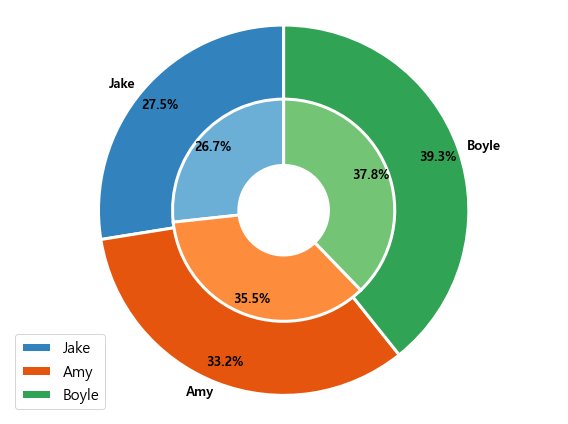

  students  math_score  english_score  physics_score  cumulative_score
0     Jake          68             70             73               138
1      Amy          82             93             85               175
2    Boyle          97             99             95               196
0    68
1    82
2    97
Name: math_score, dtype: int64


In [5]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Taking raw data of three students
source_data={'students':['Jake','Amy','Boyle'],
'math_score':[68,82,97],
'english_score':[70,93,99],
'physics_score':[73,85,95]}

# Segregating the raw data into usuable form
df=pd.DataFrame(source_data,columns=
['students','math_score','english_score','physics_score'])
df['cumulative_score']=df['math_score']+df['english_score']
+df['physics_score']

# Seperating the sub-parts of the given data
x1= df.iloc[0:3,1]
x2= df.iloc[0:3,2]

# Setting figure colors
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1,5,9]))

# Setting the size of the figure
plt.figure(figsize=(8,6))

# Plotting the outer pie
plt.pie(x1, labels = df.iloc[0:3, 0], 
       startangle=90, pctdistance =0.88 ,colors=outer_colors,
       autopct = '%1.1f%%', radius= 1.0, labeldistance=1.05,
       textprops ={ 'fontweight': 'bold','fontsize':13},
       wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" } )

# PLotting the inner pie
plt.pie(x2,startangle=90, pctdistance =0.85,colors=inner_colors,
        autopct = '%1.1f%%',radius= 0.60,
       textprops ={'fontweight': 'bold' ,'fontsize':13}, 
       wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" } )

# Creating the donut shape for the pie
centre_circle = plt.Circle((0,0), 0.25, fc='white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle) # adding the centre circle

# Plotting the pie 
plt.axis('equal')  # equal aspect ratio
plt.legend( loc=3, fontsize =15)
plt.tight_layout()
fig.set_facecolor('white')
plt.show()
print(df)
print(x1)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib notebook

facecolor = '#eaeaf2'
font_color = '#525252'
hfont = {'fontname':'Calibri'}
labels = ['Burglary','Criminal Damage','Drugs','Fraud or Forgery' ,'Other Notifiable Offences','Robbery','Sexual Offences','Theft and Handling','Violence Against the Person']
size = 0.3
vals = df['Croydon']

# Major category values = sum of minor category values
group_sum = df.groupby('major_category')['Croydon'].sum()

#1. Create a figure and subplots
fig, ax = plt.subplots(figsize=(10,6), facecolor=facecolor)

#2. Create colors
a,b,c,d,e,f,g,h,i = [plt.cm.winter, plt.cm.cool, plt.cm.spring, plt.cm.copper, plt.cm.bone, plt.cm.gist_heat, plt.cm.pink, plt.cm.summer, plt.cm.autumn]

outer_colors = [a(.6), b(.6), c(.6), d(.6), e(.6), f(.6), g(.6), h(.6), i(.6)]
inner_colors = [a(.5), a(.4), 
                b(.5), b(.4), b(.3), b(.2),
                c(.5), c(.4), c(.3),
                d(.5), d(.4),
                e(.5), e(.4),
                f(.5), f(.4),
                g(.5), g(.4),
                h(.7), h(.6), h(.5), h(.4), h(.3), h(.2), h(.1), h(5),
                i(.7), i(.6), i(.5), i(.4), i(.3), i(.2), i(.1)]

#3. Draw pies
ax.pie(group_sum, 
       radius=1, 
       colors=outer_colors, 
       labels=labels, 
       textprops={'color':font_color},
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals, 
       radius=1-size, # size=0.3
       colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

#4. Set a title
ax.set_title('Crime categories in Croydon', fontsize=18, pad=15, color=font_color, **hfont)
    
#5. Save the chart as a picture
filename = 'mpl-nested-pie'
plt.savefig(filename+'.png', facecolor=facecolor)

In [27]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib notebook

df = pd.read_excel('C:/import/nested_piechart.xlsx', header=0)

facecolor = '#eaeaf2'
font_color = '#525252'
size = 0.3
vals = df['number']

# Major category values = sum of minor category values
group_sum = df.groupby('major_category')['number'].sum().tolist()

#1. Create a figure and subplots
fig, ax = plt.subplots(figsize=(10,6), facecolor=facecolor)

#2. Create colors
a,b = [plt.cm.winter, plt.cm.cool]

outer_colors = [a(.6), b(.6)]
inner_colors = [a(.5),
                b(.5), b(.4)]

#3. Draw pies
ax.pie(x = [33,22,11], 
       radius=1, 
       colors=outer_colors, 
       labels=df['major_category'], 
       textprops={'color':font_color},
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals, 
       radius=1-size, # size=0.3
       labels=df['minor_category'].tolist(),
       colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

#4. Set a title
ax.set_title('성분기준', fontsize=18, pad=15, color=font_color)
    
plt.show()
#5. Save the chart as a picture
# filename = 'mpl-nested-pie'
# plt.savefig(filename+'.png', facecolor=facecolor)

<IPython.core.display.Javascript object>

In [30]:
df = pd.read_excel('C:/import/nested_piechart.xlsx', header=0)


group_sum = df.groupby('major_category')
print(group_sum)